# importando as bibliotecas necessárias

In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

In [4]:
dados = pd.read_csv('saude_sono.csv', sep = ";")

# Verificando dados da tabela importada

In [6]:
# formato do dataframe 
dados.shape

(374, 13)

In [7]:
# verificando os primeiros dados da planilha 
dados.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,Male,27,Software Engineer,6.1,6.0,42,6.0,Overweight,126/83,77.0,4200.0,NaN
1,2.0,Male,28,Doctor,6.2,6.0,60,8.0,Normal,125/80,75.0,10000.0,NaN
2,3.0,Male,28,Doctor,6.2,6.0,60,8.0,Normal,125/80,75.0,10000.0,NaN
3,4.0,Male,28,Sales Representative,5.9,4.0,30,8.0,Obese,140/90,85.0,3000.0,Sleep Apnea
4,5.0,Male,28,Sales Representative,5.9,4.0,30,8.0,Obese,140/90,85.0,3000.0,Sleep Apnea


In [8]:
# verificando ultimo dados da tabela
dados.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370.0,Female,59,Nurse,8.1,9.0,75,3.0,Overweight,140/95,68.0,7000.0,Sleep Apnea
370,371.0,Female,59,Nurse,8.0,9.0,75,3.0,Overweight,140/95,68.0,7000.0,Sleep Apnea
371,372.0,Female,59,Nurse,8.1,9.0,75,3.0,Overweight,140/95,68.0,7000.0,Sleep Apnea
372,373.0,Female,59,Nurse,8.1,9.0,75,3.0,Overweight,140/95,68.0,7000.0,Sleep Apnea
373,374.0,Female,59,Nurse,8.1,9.0,75,3.0,Overweight,140/95,68.0,7000.0,Sleep Apnea


In [9]:
#renomeando as colunas para PT-BR
dados.rename(columns={
    'Person ID': 'ID',
    'Gender': 'Genero',
    'Age': 'Idade',
    'Occupation': 'Ocupação',
    'Sleep Duration': 'Duração de Sono',
    'Quality of Sleep': 'Qualidade do Sono',
    'Physical Activity Level': 'Nível de Atividade Física',
    'Stress Level': 'Nível de Stress',
    'BMI Category': 'IMC',
    'Blood Pressure': 'Pressão Sanguínea',
    'Heart Rate': 'Frequêcia Cardíaca',
    'Daily Steps': 'Passos Diários',
    'Sleep Disorder': 'Distúrbio do Sono'
}, inplace=True)

In [10]:
#Verificando as alterações
dados.head(1)

,ID,Genero,Idade,Ocupação,Duração de Sono,Qualidade do Sono,Nível de Atividade Física,Nível de Stress,IMC,Pressão Sanguínea,Frequêcia Cardíaca,Passos Diários,Distúrbio do Sono
0,1.0,Male,27,Software Engineer,6.1,6.0,42,6.0,Overweight,126/83,77.0,4200.0,NaN


# Tratamento de Dados nulos encontrados na Tabela saude_sono

In [12]:
#Verificando os dados nulos
dados.isnull().sum()

ID                             2
Genero                         0
Idade                          0
Ocupação                       0
Duração de Sono                0
Qualidade do Sono              1
Nível de Atividade Física      0
Nível de Stress                1
IMC                            0
Pressão Sanguínea              0
Frequêcia Cardíaca             3
Passos Diários                 4
Distúrbio do Sono            219
dtype: int64

In [13]:
#descrição da coluna ID
dados.ID

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
369    370.0
370    371.0
371    372.0
372    373.0
373    374.0
Name: ID, Length: 374, dtype: float64

In [14]:
#Preenchendo dados nulos de ID
dados.fillna({'ID': 375}, inplace = True)
dados.fillna({'ID': 376}, inplace = True)

In [15]:
# verificando se ainda existem valores nulos
dados['ID'].isnull().sum()

0

In [18]:
# Preechendo dados nulos em Qualidade do Sono 
mediana_qualiSono = sts.median(dados['Qualidade do Sono'])
mediana_qualiSono 
dados.fillna({'Qualidade do Sono': mediana_qualiSono}, inplace= True)

In [27]:
# verificando se ainda existem valores nulos
dados['Qualidade do Sono'].isnull().sum()

0

In [30]:
# Preechendo dados nulos em Nivel de Stress 
mediana_Nivel_Stress = sts.median(dados['Qualidade do Sono'])
mediana_Nivel_Stress
dados.fillna({'Nível de Stress': mediana_Nivel_Stress}, inplace= True)

In [32]:
# verificando se ainda existem valores nulos
dados['Nível de Stress'].isnull().sum()

0

In [34]:
# Preechendo dados nulos em Frequêcia Cardíaca    
mediana_FreqCard = sts.median(dados['Frequêcia Cardíaca'])
mediana_FreqCard
dados.fillna({'Frequêcia Cardíaca': mediana_FreqCard}, inplace= True)

In [37]:
# verificando se ainda existem valores nulos
dados['Frequêcia Cardíaca'].isnull().sum()

0

In [39]:
# Preechendo dados nulos em Passos Diários   
mediana_PassosD = sts.median(dados['Passos Diários'])
mediana_PassosD
dados.fillna({'Passos Diários': mediana_PassosD}, inplace= True)

In [41]:
# verificando se ainda existem valores nulos
dados['Passos Diários'].isnull().sum()

0

In [43]:
# agrupamos disturbio do sono
dados_DistSono = dados.groupby(['Distúrbio do Sono']).size()
dados_DistSono

Distúrbio do Sono
Insomnia       77
Sleep Apnea    78
dtype: int64

In [45]:
# preenchendo os valores nulos com a moda 
dados.fillna({'Distúrbio do Sono': 'Sleep Apnea'}, inplace = True)

In [47]:
# verificar se ainda existem valores nulos
dados['Distúrbio do Sono'].isnull().sum()

0

In [49]:
#Verificando todos os dados nulos
dados.isnull().sum()

ID                           0
Genero                       0
Idade                        0
Ocupação                     0
Duração de Sono              0
Qualidade do Sono            0
Nível de Atividade Física    0
Nível de Stress              0
IMC                          0
Pressão Sanguínea            0
Frequêcia Cardíaca           0
Passos Diários               0
Distúrbio do Sono            0
dtype: int64

# Descobrindo os valores dos limites -  Outliers 

In [52]:
#relembrando o resumo estatístico
dados['Idade'].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Idade, dtype: float64

In [54]:
# descobrir os valores dos limites de Idade

q1 = 35
q3 = 50
iq = q3 - q1
lim_inf =  q1 - 1.5 * iq
lim_sup = q3 + 1.5 * iq

print('iq: ', iq, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

iq:  15 
lim_inf:  12.5 
lim_sup:  72.5


In [56]:
# conferir se ainda tem outlier
dados.loc[((dados['Idade'] <= lim_inf) | (dados['Idade'] >= lim_sup))]

,ID,Genero,Idade,Ocupação,Duração de Sono,Qualidade do Sono,Nível de Atividade Física,Nível de Stress,IMC,Pressão Sanguínea,Frequêcia Cardíaca,Passos Diários,Distúrbio do Sono


In [58]:
#relembrando o resumo estatístico
dados['Duração de Sono'].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Duração de Sono, dtype: float64

In [60]:
# descobrir os valores dos limites de Duração de Sono

q1 = 6.400
q3 =  7.800
iq = q3 - q1
lim_inf =  q1 - 1.5 * iq
lim_sup = q3 + 1.5 * iq

print('iq: ', iq, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

iq:  1.3999999999999995 
lim_inf:  4.300000000000001 
lim_sup:  9.899999999999999


In [62]:
# conferir se ainda tem outlier
dados.loc[((dados['Duração de Sono'] <= lim_inf) | (dados['Duração de Sono'] >= lim_sup))]

,ID,Genero,Idade,Ocupação,Duração de Sono,Qualidade do Sono,Nível de Atividade Física,Nível de Stress,IMC,Pressão Sanguínea,Frequêcia Cardíaca,Passos Diários,Distúrbio do Sono


In [64]:
#relembrando o resumo estatístico
dados['Qualidade do Sono'].describe()

count    374.000000
mean       7.283422
std        1.350164
min       -5.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Qualidade do Sono, dtype: float64

In [66]:
# descobrir os valores dos limites de Qualidade do Sono

q1 = 6.00
q3 =  8.00
iq = q3 - q1
lim_inf =  q1 - 1.5 * iq
lim_sup = q3 + 1.5 * iq

print('iq: ', iq, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

iq:  2.0 
lim_inf:  3.0 
lim_sup:  11.0


In [68]:
# conferir se ainda tem outlier
dados.loc[((dados['Qualidade do Sono'] <= lim_inf) | (dados['Qualidade do Sono'] >= lim_sup))]

,ID,Genero,Idade,Ocupação,Duração de Sono,Qualidade do Sono,Nível de Atividade Física,Nível de Stress,IMC,Pressão Sanguínea,Frequêcia Cardíaca,Passos Diários,Distúrbio do Sono
16,17.0,Female,29,Nurse,6.5,-5.0,40,7.0,Normal Weight,132/87,80.0,4000.0,Sleep Apnea


In [70]:
# descobrir os valores dos limites de Nível de Atividade Física

q1 = 45
q3 =  75
iq = q3 - q1
lim_inf =  q1 - 1.5 * iq
lim_sup = q3 + 1.5 * iq

print('iq: ', iq, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

iq:  30 
lim_inf:  0.0 
lim_sup:  120.0


In [72]:
mediana_Naf = sts.median(dados['Nível de Atividade Física'])
mediana_Naf

60.0

In [74]:
# substituir os outliers pela mediana
# valores abaixo de lim_inf OU acima de lim_sup
dados.loc[((dados['Nível de Atividade Física'] <= lim_inf) | 
           (dados['Nível de Atividade Física'] >= lim_sup)), 
'Nível de Atividade Física'] = mediana_Naf


In [76]:
# conferir se ainda tem outlier
dados.loc[((dados['Nível de Atividade Física'] <= lim_inf) | (dados['Nível de Atividade Física'] >= lim_sup))]

,ID,Genero,Idade,Ocupação,Duração de Sono,Qualidade do Sono,Nível de Atividade Física,Nível de Stress,IMC,Pressão Sanguínea,Frequêcia Cardíaca,Passos Diários,Distúrbio do Sono


In [78]:
#relembrando o resumo estatístico
dados['Nível de Stress'].describe()

count    374.000000
mean       5.382353
std        1.771326
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Nível de Stress, dtype: float64

In [80]:
# descobrir os valores dos limites de Nível de Stress

q1 = 4.00
q3 =  7.00
iq = q3 - q1
lim_inf =  q1 - 1.5 * iq
lim_sup = q3 + 1.5 * iq

print('iq: ', iq, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

iq:  3.0 
lim_inf:  -0.5 
lim_sup:  11.5


In [82]:
mediana_Ns = sts.median(dados['Nível de Stress'])
mediana_Ns

5.0

In [84]:
# substituir os outliers pela mediana
# valores abaixo de lim_inf OU acima de lim_sup
dados.loc[((dados['Nível de Stress'] <= lim_inf) | 
           (dados['Nível de Stress'] >= lim_sup)), 
            'Nível de Stress'] = mediana_Ns

In [86]:
# conferir se ainda tem outlier
dados.loc[((dados['Nível de Stress'] <= lim_inf) | 
           (dados['Nível de Stress'] >= lim_sup))]

,ID,Genero,Idade,Ocupação,Duração de Sono,Qualidade do Sono,Nível de Atividade Física,Nível de Stress,IMC,Pressão Sanguínea,Frequêcia Cardíaca,Passos Diários,Distúrbio do Sono


In [88]:
#relembrando o resumo estatístico
dados['Passos Diários'].describe()

count      374.000000
mean      6794.644385
std       1645.132622
min         -3.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Passos Diários, dtype: float64

In [90]:
# descobrir os valores dos Passos Diários

q1 = 5600
q3 =  8000
iq = q3 - q1
lim_inf =  q1 - 1.5 * iq
lim_sup = q3 + 1.5 * iq

print('iq: ', iq, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

iq:  2400 
lim_inf:  2000.0 
lim_sup:  11600.0


In [92]:
mediana_Ps = sts.median(dados['Passos Diários'])
mediana_Ps

7000.0

In [94]:
# substituir os outliers pela mediana
# valores abaixo de lim_inf OU acima de lim_sup
dados.loc[((dados['Passos Diários'] <= lim_inf) |
           (dados['Passos Diários'] >= lim_sup)),'Passos Diários'] = mediana_Ps

In [96]:
# conferir se ainda tem outlier
dados.loc[((dados['Passos Diários'] <= lim_inf) | (dados['Passos Diários'] >= lim_sup))]

,ID,Genero,Idade,Ocupação,Duração de Sono,Qualidade do Sono,Nível de Atividade Física,Nível de Stress,IMC,Pressão Sanguínea,Frequêcia Cardíaca,Passos Diários,Distúrbio do Sono


# Gráficos

# Gráfico de Barras comparando Ocupação X Nível de Stress

Text(0.5, 1.0, 'Nível de Stress dos Médicos')

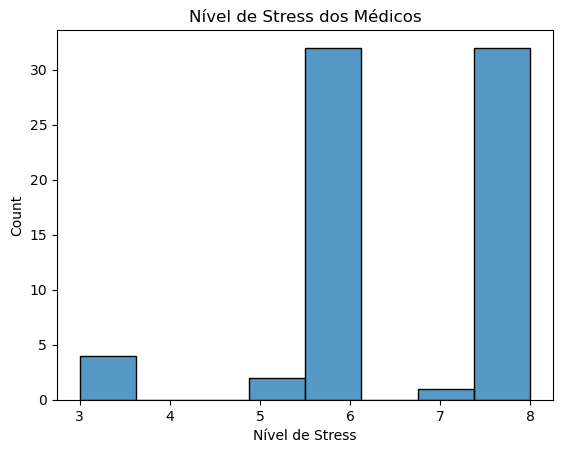

In [100]:
srn.histplot(
    dados.loc[dados['Ocupação'] == 'Doctor']['Nível de Stress']
).set_title('Nível de Stress dos Médicos')

Text(0.5, 1.0, 'Nível de Atividade Física')

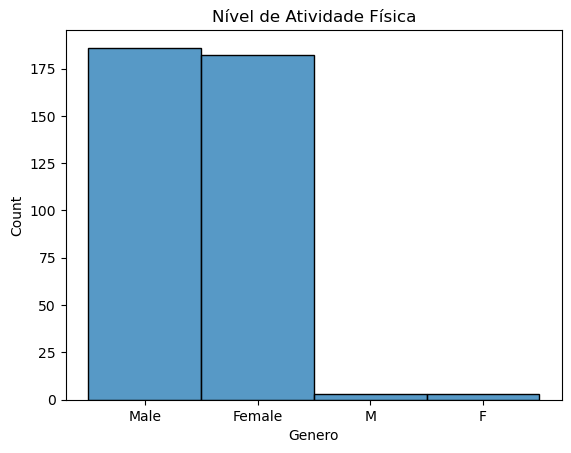

In [101]:
# histograma da atividade física (Nível de Atividade Física)
srn.histplot(dados['Genero'],
            bins = 10).set_title('Nível de Atividade Física')

In [103]:
# Padronizar os valores da coluna 'Genero'
dados['Genero'] = dados['Genero'].replace({
    'M': 'Male',
    'F': 'Female',
    'm': 'Male',
    'f': 'Female'
})


<Axes: xlabel='Genero', ylabel='Qualidade do Sono'>

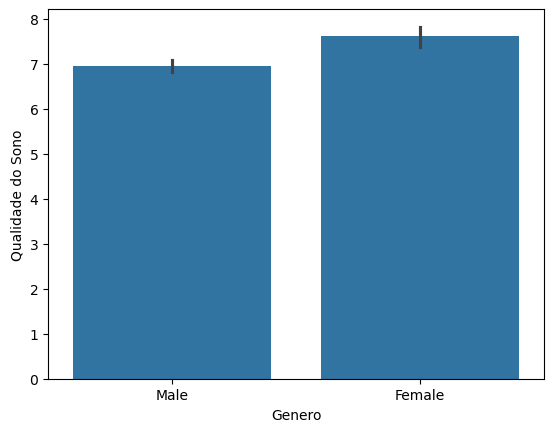

In [105]:
# histograma da atividade física (Nível de Atividade Física)
srn.barplot(data=dados, x='Genero', y='Qualidade do Sono', estimator='mean')

In [108]:
#Verificando as ocupações
dados['Ocupação'].unique()


array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'teacher', 'accountant', 'Salesperson', 'Manager'], dtype=object)

Text(0.5, 1.0, 'Nível de Atividade Física x Idade (Engenheiros de Software)')

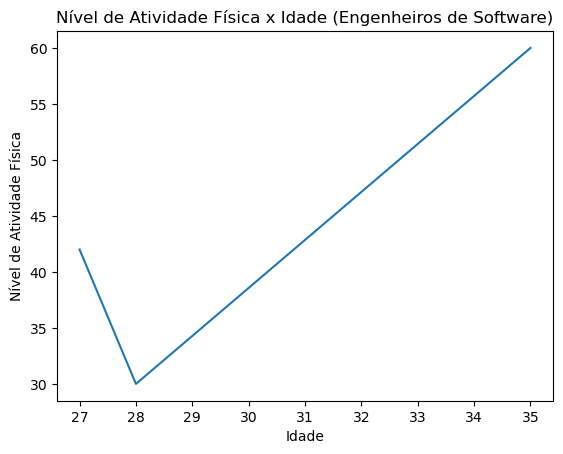

In [110]:
# histograma do nivel de atividade física dos Engenheiros de Software
srn.lineplot(
    data=dados[dados['Ocupação'] == 'Software Engineer'],
    x='Idade',
    y='Nível de Atividade Física'
).set_title('Nível de Atividade Física x Idade (Engenheiros de Software)')


Text(0.5, 1.0, 'Nível de Qualidade do Sono dos Doutores')

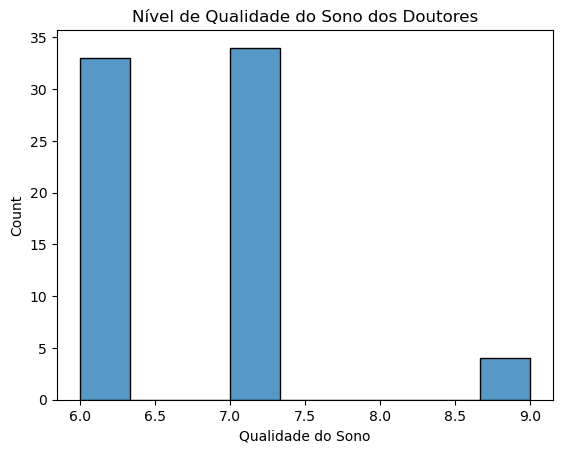

In [112]:
# histograma do nivel da qualidade de sono dos Doutores
srn.histplot(
    dados.loc[dados['Ocupação'] == 'Doctor']['Qualidade do Sono'],
    bins = 9
).set_title('Nível de Qualidade do Sono dos Doutores')

Text(0.5, 1.0, 'Nível de Duração de Sono das Enfermeiras')

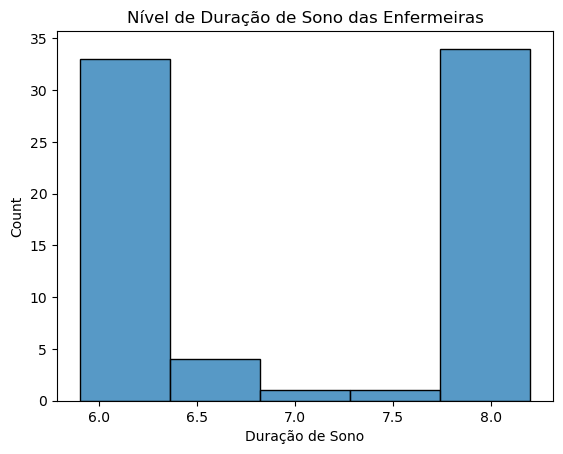

In [114]:
# histograma do nivel de duração de sono das enfermeiras
srn.histplot(
    dados.loc[dados['Ocupação'] == 'Nurse']['Duração de Sono'],
    bins = 5
).set_title('Nível de Duração de Sono das Enfermeiras')